In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.4 MB/s 


In [ ]:
!pip install -q "tqdm>=4.36.1"

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import os
import zipfile
import pandas as pd
import numpy as np
import pickle
from sklearn.utils import class_weight
from keras import regularizers
import random
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from tensorflow.keras import models
from google.colab import drive
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import tensorflow_datasets as tfds
import tqdm
import tensorflow_addons as tfa
from tensorflow.keras.utils import image_dataset_from_directory
from PIL import Image
import os
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import shutil
import matplotlib.pyplot as plt
import cv2 as cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Unzip sets

In [ ]:
!unzip -q "/content/drive/Shareddrives/DeepLearningProject/dataset_Preprocessing_638/trainingSet.zip" -d "/content"

In [ ]:
!unzip -q "/content/drive/Shareddrives/DeepLearningProject/dataset_Preprocessing_638/validationSet.zip" -d "/content"

In [ ]:
!unzip -q "/content/drive/Shareddrives/DeepLearningProject/testSet.zip" -d "/content"

In [ ]:
!unzip -q "/content/drive/Shareddrives/DeepLearningProject/trainingSetALL.zip" -d "/"

In [ ]:
!rm -r "/content/trainingSet/"
!rm -r "/content/testSet/"
!rm -r "/content/validationSet/"

rm: cannot remove '/content/testSet/': No such file or directory


# Creation training validation and test sets

In [ ]:
BATCH_SIZE = 100
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

In [ ]:
training_dir = PATH = '/content/trainingSet/'
validation_dir = PATH = '/content/validationSet/'

training_dataset = tf.keras.utils.image_dataset_from_directory(
  training_dir,
  label_mode="categorical",
  labels="inferred",
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
  validation_dir,
  label_mode="categorical",
  labels="inferred",
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)


Found 3190 files belonging to 5 classes.
Found 3510 files belonging to 5 classes.


In [ ]:
test_dir = PATH = '/content/testSet/'

test_dataset = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  label_mode="categorical",
  labels="inferred",
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

Found 53576 files belonging to 5 classes.


# Define and load pretrained Model

In [ ]:
data_augmentation = keras.Sequential(
  [
  layers.RandomFlip("vertical"),
  layers.RandomFlip("horizontal"),
  layers.RandomZoom(factor=0.1, fill_mode="constant", fill_value=0.0),
  layers.RandomRotation(factor=1, fill_mode="constant", fill_value=0.0),
  ]
)


#flip non hanno bisogno della fill le altre l'abbiamo usata

## Define conv_base 

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.trainable = False

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Different feature extraction on the conv_base

### Exp 1

In [ ]:
inputs = keras.Input(shape=(224,224,3))
inputs = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
outputs = layers.Dense(5, activation="softmax")(x)

model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                             

In [ ]:
inputs = keras.Input(shape=(224,224,3))
inputs = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
outputs = layers.Dense(5, activation="softmax")(x)

model = keras.Model(inputs, outputs)
history = run_model(run_model(model, 0.00001, "Adam")

Training:   0%|           0/100 ETA: ?s,  ?epochs/s

Epoch 1/100


0/32           ETA: ?s - 

Epoch 1/100
32/32 [==============================] - ETA: 0s - loss: 9.2324 - accuracy: 0.2389
Epoch 00001: val_loss improved from inf to 7.03940, saving model to /content/models/weights.01-7.04.hdf5
32/32 [==============================] - 191s 6s/step - loss: 9.2324 - accuracy: 0.2389 - val_loss: 7.0394 - val_accuracy: 0.2729
Epoch 2/100


0/32           ETA: ?s - 

Epoch 2/100
32/32 [==============================] - ETA: 0s - loss: 6.1852 - accuracy: 0.3361
Epoch 00002: val_loss did not improve from 7.03940
32/32 [==============================] - 188s 6s/step - loss: 6.1852 - accuracy: 0.3361 - val_loss: 7.4361 - val_accuracy: 0.2199
Epoch 3/100


0/32           ETA: ?s - 

Epoch 3/100
32/32 [==============================] - ETA: 0s - loss: 4.8740 - accuracy: 0.3900
Epoch 00003: val_loss improved from 7.03940 to 5.48282, saving model to /content/models/weights.03-5.48.hdf5
32/32 [==============================] - 189s 6s/step - loss: 4.8740 - accuracy: 0.3900 - val_loss: 5.4828 - val_accuracy: 0.3259
Epoch 4/100


0/32           ETA: ?s - 

Epoch 4/100
32/32 [==============================] - ETA: 0s - loss: 4.0100 - accuracy: 0.4295
Epoch 00004: val_loss did not improve from 5.48282
32/32 [==============================] - 189s 6s/step - loss: 4.0100 - accuracy: 0.4295 - val_loss: 5.6973 - val_accuracy: 0.2906
Epoch 5/100


0/32           ETA: ?s - 

Epoch 5/100
32/32 [==============================] - ETA: 0s - loss: 3.2962 - accuracy: 0.4771
Epoch 00005: val_loss did not improve from 5.48282
32/32 [==============================] - 188s 6s/step - loss: 3.2962 - accuracy: 0.4771 - val_loss: 5.5539 - val_accuracy: 0.2883
Epoch 6/100


0/32           ETA: ?s - 

Epoch 6/100
32/32 [==============================] - ETA: 0s - loss: 2.7684 - accuracy: 0.5229
Epoch 00006: val_loss improved from 5.48282 to 4.73755, saving model to /content/models/weights.06-4.74.hdf5
32/32 [==============================] - 189s 6s/step - loss: 2.7684 - accuracy: 0.5229 - val_loss: 4.7375 - val_accuracy: 0.3464
Epoch 7/100


0/32           ETA: ?s - 

Epoch 7/100
32/32 [==============================] - ETA: 0s - loss: 2.3508 - accuracy: 0.5458
Epoch 00007: val_loss did not improve from 4.73755
32/32 [==============================] - 188s 6s/step - loss: 2.3508 - accuracy: 0.5458 - val_loss: 4.8361 - val_accuracy: 0.3311
Epoch 8/100


0/32           ETA: ?s - 

Epoch 8/100
32/32 [==============================] - ETA: 0s - loss: 1.9888 - accuracy: 0.5956
Epoch 00008: val_loss did not improve from 4.73755
32/32 [==============================] - 188s 6s/step - loss: 1.9888 - accuracy: 0.5956 - val_loss: 4.8313 - val_accuracy: 0.3285
Epoch 9/100


0/32           ETA: ?s - 

Epoch 9/100
32/32 [==============================] - ETA: 0s - loss: 1.6294 - accuracy: 0.6498
Epoch 00009: val_loss did not improve from 4.73755
32/32 [==============================] - 188s 6s/step - loss: 1.6294 - accuracy: 0.6498 - val_loss: 4.8394 - val_accuracy: 0.3222
Epoch 10/100


0/32           ETA: ?s - 

Epoch 10/100
32/32 [==============================] - ETA: 0s - loss: 1.3875 - accuracy: 0.6831
Epoch 00010: val_loss did not improve from 4.73755
32/32 [==============================] - 188s 6s/step - loss: 1.3875 - accuracy: 0.6831 - val_loss: 4.9186 - val_accuracy: 0.3151
Epoch 11/100


0/32           ETA: ?s - 

Epoch 11/100
32/32 [==============================] - ETA: 0s - loss: 1.1601 - accuracy: 0.7197
Epoch 00011: val_loss did not improve from 4.73755
32/32 [==============================] - 188s 6s/step - loss: 1.1601 - accuracy: 0.7197 - val_loss: 4.9317 - val_accuracy: 0.3103
Epoch 12/100


0/32           ETA: ?s - 

Epoch 12/100
32/32 [==============================] - ETA: 0s - loss: 1.0019 - accuracy: 0.7426
Epoch 00012: val_loss did not improve from 4.73755
32/32 [==============================] - 188s 6s/step - loss: 1.0019 - accuracy: 0.7426 - val_loss: 4.8111 - val_accuracy: 0.3194
Epoch 13/100


0/32           ETA: ?s - 

Epoch 13/100
32/32 [==============================] - ETA: 0s - loss: 0.8454 - accuracy: 0.7837
Epoch 00013: val_loss improved from 4.73755 to 4.65223, saving model to /content/models/weights.13-4.65.hdf5
32/32 [==============================] - 189s 6s/step - loss: 0.8454 - accuracy: 0.7837 - val_loss: 4.6522 - val_accuracy: 0.3291
Epoch 14/100


0/32           ETA: ?s - 

Epoch 14/100
32/32 [==============================] - ETA: 0s - loss: 0.7310 - accuracy: 0.8060
Epoch 00014: val_loss did not improve from 4.65223
32/32 [==============================] - 188s 6s/step - loss: 0.7310 - accuracy: 0.8060 - val_loss: 4.9444 - val_accuracy: 0.3040
Epoch 15/100


0/32           ETA: ?s - 

Epoch 15/100
32/32 [==============================] - ETA: 0s - loss: 0.6137 - accuracy: 0.8386
Epoch 00015: val_loss did not improve from 4.65223
32/32 [==============================] - 188s 6s/step - loss: 0.6137 - accuracy: 0.8386 - val_loss: 4.8891 - val_accuracy: 0.3071
Epoch 16/100


0/32           ETA: ?s - 

Epoch 16/100
32/32 [==============================] - ETA: 0s - loss: 0.5189 - accuracy: 0.8674
Epoch 00016: val_loss did not improve from 4.65223
32/32 [==============================] - 188s 6s/step - loss: 0.5189 - accuracy: 0.8674 - val_loss: 4.9953 - val_accuracy: 0.2989
Epoch 17/100


0/32           ETA: ?s - 

Epoch 17/100
32/32 [==============================] - ETA: 0s - loss: 0.4746 - accuracy: 0.8693
Epoch 00017: val_loss improved from 4.65223 to 4.50068, saving model to /content/models/weights.17-4.50.hdf5
32/32 [==============================] - 189s 6s/step - loss: 0.4746 - accuracy: 0.8693 - val_loss: 4.5007 - val_accuracy: 0.3444
Epoch 18/100


0/32           ETA: ?s - 

Epoch 18/100
32/32 [==============================] - ETA: 0s - loss: 0.3891 - accuracy: 0.8969
Epoch 00018: val_loss improved from 4.50068 to 4.37708, saving model to /content/models/weights.18-4.38.hdf5
32/32 [==============================] - 189s 6s/step - loss: 0.3891 - accuracy: 0.8969 - val_loss: 4.3771 - val_accuracy: 0.3527
Epoch 19/100


0/32           ETA: ?s - 

Epoch 19/100
32/32 [==============================] - ETA: 0s - loss: 0.3397 - accuracy: 0.9110
Epoch 00019: val_loss improved from 4.37708 to 4.36141, saving model to /content/models/weights.19-4.36.hdf5
32/32 [==============================] - 189s 6s/step - loss: 0.3397 - accuracy: 0.9110 - val_loss: 4.3614 - val_accuracy: 0.3556
Epoch 20/100


0/32           ETA: ?s - 

Epoch 20/100
32/32 [==============================] - ETA: 0s - loss: 0.2784 - accuracy: 0.9304
Epoch 00020: val_loss did not improve from 4.36141
32/32 [==============================] - 188s 6s/step - loss: 0.2784 - accuracy: 0.9304 - val_loss: 4.9092 - val_accuracy: 0.3040
Epoch 21/100


0/32           ETA: ?s - 

Epoch 21/100
32/32 [==============================] - ETA: 0s - loss: 0.2374 - accuracy: 0.9473
Epoch 00021: val_loss did not improve from 4.36141
32/32 [==============================] - 188s 6s/step - loss: 0.2374 - accuracy: 0.9473 - val_loss: 4.8170 - val_accuracy: 0.3120
Epoch 22/100


0/32           ETA: ?s - 

Epoch 22/100
32/32 [==============================] - ETA: 0s - loss: 0.2022 - accuracy: 0.9574
Epoch 00022: val_loss did not improve from 4.36141
32/32 [==============================] - 188s 6s/step - loss: 0.2022 - accuracy: 0.9574 - val_loss: 4.9983 - val_accuracy: 0.2966
Epoch 23/100


0/32           ETA: ?s - 

Epoch 23/100
32/32 [==============================] - ETA: 0s - loss: 0.1858 - accuracy: 0.9611
Epoch 00023: val_loss did not improve from 4.36141
32/32 [==============================] - 188s 6s/step - loss: 0.1858 - accuracy: 0.9611 - val_loss: 4.6689 - val_accuracy: 0.3262
Epoch 24/100


0/32           ETA: ?s - 

Epoch 24/100
32/32 [==============================] - ETA: 0s - loss: 0.1539 - accuracy: 0.9721
Epoch 00024: val_loss did not improve from 4.36141
32/32 [==============================] - 188s 6s/step - loss: 0.1539 - accuracy: 0.9721 - val_loss: 4.6716 - val_accuracy: 0.3259
Epoch 25/100


0/32           ETA: ?s - 

Epoch 25/100
32/32 [==============================] - ETA: 0s - loss: 0.1298 - accuracy: 0.9812
Epoch 00025: val_loss did not improve from 4.36141
32/32 [==============================] - 188s 6s/step - loss: 0.1298 - accuracy: 0.9812 - val_loss: 4.7936 - val_accuracy: 0.3145
Epoch 26/100


0/32           ETA: ?s - 

Epoch 26/100
32/32 [==============================] - ETA: 0s - loss: 0.1124 - accuracy: 0.9868
Epoch 00026: val_loss did not improve from 4.36141
32/32 [==============================] - 188s 6s/step - loss: 0.1124 - accuracy: 0.9868 - val_loss: 4.8402 - val_accuracy: 0.3142
Epoch 27/100


0/32           ETA: ?s - 

Epoch 27/100
32/32 [==============================] - ETA: 0s - loss: 0.0992 - accuracy: 0.9909
Epoch 00027: val_loss did not improve from 4.36141
32/32 [==============================] - 188s 6s/step - loss: 0.0992 - accuracy: 0.9909 - val_loss: 4.6805 - val_accuracy: 0.3276
Epoch 28/100


0/32           ETA: ?s - 

Epoch 28/100
32/32 [==============================] - ETA: 0s - loss: 0.0891 - accuracy: 0.9931
Epoch 00028: val_loss did not improve from 4.36141
32/32 [==============================] - 188s 6s/step - loss: 0.0891 - accuracy: 0.9931 - val_loss: 4.7171 - val_accuracy: 0.3245
Epoch 29/100


0/32           ETA: ?s - 

Epoch 29/100
32/32 [==============================] - ETA: 0s - loss: 0.0803 - accuracy: 0.9950
Epoch 00029: val_loss did not improve from 4.36141
32/32 [==============================] - 188s 6s/step - loss: 0.0803 - accuracy: 0.9950 - val_loss: 4.7528 - val_accuracy: 0.3185
Epoch 00029: early stopping


TypeError: ignored

### Exp 2

In [ ]:
inputs = keras.Input(shape=(224,224,3))
inputs = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation="softmax")(x)

model = keras.Model(inputs, outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_1   (None, 224, 224, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211

In [ ]:
inputs = keras.Input(shape=(224,224,3))
inputs = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation="softmax")(x)

model = keras.Model(inputs, outputs)

history = run_model(run_model(model, 0.00001, "Adam")

Training:   0%|           0/100 ETA: ?s,  ?epochs/s

Epoch 1/100


0/32           ETA: ?s - 

Epoch 1/100
32/32 [==============================] - ETA: 0s - loss: 17.2161 - accuracy: 0.2263
Epoch 00001: val_loss improved from inf to 7.88078, saving model to /content/models/weights.01-7.88.hdf5
32/32 [==============================] - 191s 6s/step - loss: 17.2161 - accuracy: 0.2263 - val_loss: 7.8808 - val_accuracy: 0.2866
Epoch 2/100


0/32           ETA: ?s - 

Epoch 2/100
32/32 [==============================] - ETA: 0s - loss: 14.0020 - accuracy: 0.2611
Epoch 00002: val_loss did not improve from 7.88078
32/32 [==============================] - 188s 6s/step - loss: 14.0020 - accuracy: 0.2611 - val_loss: 8.1871 - val_accuracy: 0.2487
Epoch 3/100


0/32           ETA: ?s - 

Epoch 3/100
32/32 [==============================] - ETA: 0s - loss: 12.2706 - accuracy: 0.2878
Epoch 00003: val_loss improved from 7.88078 to 6.72904, saving model to /content/models/weights.03-6.73.hdf5
32/32 [==============================] - 188s 6s/step - loss: 12.2706 - accuracy: 0.2878 - val_loss: 6.7290 - val_accuracy: 0.3083
Epoch 4/100


0/32           ETA: ?s - 

Epoch 4/100
32/32 [==============================] - ETA: 0s - loss: 11.4410 - accuracy: 0.3069
Epoch 00004: val_loss did not improve from 6.72904
32/32 [==============================] - 188s 6s/step - loss: 11.4410 - accuracy: 0.3069 - val_loss: 8.4403 - val_accuracy: 0.2194
Epoch 5/100


0/32           ETA: ?s - 

Epoch 5/100
32/32 [==============================] - ETA: 0s - loss: 10.2041 - accuracy: 0.3229
Epoch 00005: val_loss improved from 6.72904 to 6.38838, saving model to /content/models/weights.05-6.39.hdf5
32/32 [==============================] - 188s 6s/step - loss: 10.2041 - accuracy: 0.3229 - val_loss: 6.3884 - val_accuracy: 0.3151
Epoch 6/100


0/32           ETA: ?s - 

Epoch 6/100
32/32 [==============================] - ETA: 0s - loss: 9.7093 - accuracy: 0.3448
Epoch 00006: val_loss improved from 6.38838 to 5.93647, saving model to /content/models/weights.06-5.94.hdf5
32/32 [==============================] - 188s 6s/step - loss: 9.7093 - accuracy: 0.3448 - val_loss: 5.9365 - val_accuracy: 0.3470
Epoch 7/100


0/32           ETA: ?s - 

Epoch 7/100
32/32 [==============================] - ETA: 0s - loss: 9.0732 - accuracy: 0.3514
Epoch 00007: val_loss did not improve from 5.93647
32/32 [==============================] - 188s 6s/step - loss: 9.0732 - accuracy: 0.3514 - val_loss: 6.2988 - val_accuracy: 0.3017
Epoch 8/100


0/32           ETA: ?s - 

Epoch 8/100
32/32 [==============================] - ETA: 0s - loss: 8.8551 - accuracy: 0.3674
Epoch 00008: val_loss did not improve from 5.93647
32/32 [==============================] - 188s 6s/step - loss: 8.8551 - accuracy: 0.3674 - val_loss: 6.1697 - val_accuracy: 0.3114
Epoch 9/100


0/32           ETA: ?s - 

Epoch 9/100
32/32 [==============================] - ETA: 0s - loss: 8.0590 - accuracy: 0.3821
Epoch 00009: val_loss improved from 5.93647 to 5.86341, saving model to /content/models/weights.09-5.86.hdf5
32/32 [==============================] - 188s 6s/step - loss: 8.0590 - accuracy: 0.3821 - val_loss: 5.8634 - val_accuracy: 0.3402
Epoch 10/100


0/32           ETA: ?s - 

Epoch 10/100
32/32 [==============================] - ETA: 0s - loss: 7.7787 - accuracy: 0.3959
Epoch 00010: val_loss did not improve from 5.86341
32/32 [==============================] - 188s 6s/step - loss: 7.7787 - accuracy: 0.3959 - val_loss: 7.1080 - val_accuracy: 0.2547
Epoch 11/100


0/32           ETA: ?s - 

Epoch 11/100
32/32 [==============================] - ETA: 0s - loss: 7.6769 - accuracy: 0.3975
Epoch 00011: val_loss did not improve from 5.86341
32/32 [==============================] - 188s 6s/step - loss: 7.6769 - accuracy: 0.3975 - val_loss: 6.0829 - val_accuracy: 0.3114
Epoch 12/100


0/32           ETA: ?s - 

Epoch 12/100
32/32 [==============================] - ETA: 0s - loss: 7.4219 - accuracy: 0.4066
Epoch 00012: val_loss did not improve from 5.86341
32/32 [==============================] - 188s 6s/step - loss: 7.4219 - accuracy: 0.4066 - val_loss: 6.7205 - val_accuracy: 0.2832
Epoch 13/100


0/32           ETA: ?s - 

Epoch 13/100
32/32 [==============================] - ETA: 0s - loss: 7.1783 - accuracy: 0.4194
Epoch 00013: val_loss improved from 5.86341 to 5.66106, saving model to /content/models/weights.13-5.66.hdf5
32/32 [==============================] - 219s 7s/step - loss: 7.1783 - accuracy: 0.4194 - val_loss: 5.6611 - val_accuracy: 0.3433
Epoch 14/100


0/32           ETA: ?s - 

Epoch 14/100
32/32 [==============================] - ETA: 0s - loss: 6.7969 - accuracy: 0.4201
Epoch 00014: val_loss improved from 5.66106 to 5.55540, saving model to /content/models/weights.14-5.56.hdf5
32/32 [==============================] - 188s 6s/step - loss: 6.7969 - accuracy: 0.4201 - val_loss: 5.5554 - val_accuracy: 0.3402
Epoch 15/100


0/32           ETA: ?s - 

Epoch 15/100
32/32 [==============================] - ETA: 0s - loss: 6.5089 - accuracy: 0.4379
Epoch 00015: val_loss did not improve from 5.55540
32/32 [==============================] - 188s 6s/step - loss: 6.5089 - accuracy: 0.4379 - val_loss: 5.8226 - val_accuracy: 0.3228
Epoch 16/100


0/32           ETA: ?s - 

Epoch 16/100
32/32 [==============================] - ETA: 0s - loss: 6.2143 - accuracy: 0.4442
Epoch 00016: val_loss did not improve from 5.55540
32/32 [==============================] - 188s 6s/step - loss: 6.2143 - accuracy: 0.4442 - val_loss: 6.3368 - val_accuracy: 0.2912
Epoch 17/100


0/32           ETA: ?s - 

Epoch 17/100
32/32 [==============================] - ETA: 0s - loss: 6.3769 - accuracy: 0.4423
Epoch 00017: val_loss did not improve from 5.55540
32/32 [==============================] - 189s 6s/step - loss: 6.3769 - accuracy: 0.4423 - val_loss: 5.7980 - val_accuracy: 0.3285
Epoch 18/100


0/32           ETA: ?s - 

Epoch 18/100
32/32 [==============================] - ETA: 0s - loss: 5.8405 - accuracy: 0.4527
Epoch 00018: val_loss did not improve from 5.55540
32/32 [==============================] - 189s 6s/step - loss: 5.8405 - accuracy: 0.4527 - val_loss: 5.6947 - val_accuracy: 0.3339
Epoch 19/100


0/32           ETA: ?s - 

Epoch 19/100
32/32 [==============================] - ETA: 0s - loss: 5.7685 - accuracy: 0.4649
Epoch 00019: val_loss did not improve from 5.55540
32/32 [==============================] - 189s 6s/step - loss: 5.7685 - accuracy: 0.4649 - val_loss: 5.7613 - val_accuracy: 0.3259
Epoch 20/100


0/32           ETA: ?s - 

Epoch 20/100
32/32 [==============================] - ETA: 0s - loss: 5.5223 - accuracy: 0.4762
Epoch 00020: val_loss improved from 5.55540 to 5.14808, saving model to /content/models/weights.20-5.15.hdf5
32/32 [==============================] - 189s 6s/step - loss: 5.5223 - accuracy: 0.4762 - val_loss: 5.1481 - val_accuracy: 0.3741
Epoch 21/100


0/32           ETA: ?s - 

Epoch 21/100
32/32 [==============================] - ETA: 0s - loss: 5.3620 - accuracy: 0.4821
Epoch 00021: val_loss improved from 5.14808 to 5.03496, saving model to /content/models/weights.21-5.03.hdf5
32/32 [==============================] - 189s 6s/step - loss: 5.3620 - accuracy: 0.4821 - val_loss: 5.0350 - val_accuracy: 0.3929
Epoch 22/100


0/32           ETA: ?s - 

Epoch 22/100
32/32 [==============================] - ETA: 0s - loss: 5.3498 - accuracy: 0.4893
Epoch 00022: val_loss improved from 5.03496 to 4.94309, saving model to /content/models/weights.22-4.94.hdf5
32/32 [==============================] - 189s 6s/step - loss: 5.3498 - accuracy: 0.4893 - val_loss: 4.9431 - val_accuracy: 0.3872
Epoch 23/100


0/32           ETA: ?s - 

Epoch 23/100
32/32 [==============================] - ETA: 0s - loss: 4.9123 - accuracy: 0.5100
Epoch 00023: val_loss did not improve from 4.94309
32/32 [==============================] - 189s 6s/step - loss: 4.9123 - accuracy: 0.5100 - val_loss: 6.1603 - val_accuracy: 0.3023
Epoch 24/100


0/32           ETA: ?s - 

Epoch 24/100
32/32 [==============================] - ETA: 0s - loss: 5.0322 - accuracy: 0.4887
Epoch 00024: val_loss did not improve from 4.94309
32/32 [==============================] - 189s 6s/step - loss: 5.0322 - accuracy: 0.4887 - val_loss: 6.0544 - val_accuracy: 0.3077
Epoch 25/100


0/32           ETA: ?s - 

Epoch 25/100
32/32 [==============================] - ETA: 0s - loss: 4.7137 - accuracy: 0.5163
Epoch 00025: val_loss did not improve from 4.94309
32/32 [==============================] - 189s 6s/step - loss: 4.7137 - accuracy: 0.5163 - val_loss: 5.9075 - val_accuracy: 0.3199
Epoch 26/100


0/32           ETA: ?s - 

Epoch 26/100
32/32 [==============================] - ETA: 0s - loss: 4.4333 - accuracy: 0.5307
Epoch 00026: val_loss did not improve from 4.94309
32/32 [==============================] - 189s 6s/step - loss: 4.4333 - accuracy: 0.5307 - val_loss: 5.4688 - val_accuracy: 0.3513
Epoch 27/100


0/32           ETA: ?s - 

Epoch 27/100
32/32 [==============================] - ETA: 0s - loss: 4.3841 - accuracy: 0.5357
Epoch 00027: val_loss did not improve from 4.94309
32/32 [==============================] - 189s 6s/step - loss: 4.3841 - accuracy: 0.5357 - val_loss: 5.2158 - val_accuracy: 0.3687
Epoch 28/100


0/32           ETA: ?s - 

Epoch 28/100
32/32 [==============================] - ETA: 0s - loss: 4.4634 - accuracy: 0.5332
Epoch 00028: val_loss did not improve from 4.94309
32/32 [==============================] - 188s 6s/step - loss: 4.4634 - accuracy: 0.5332 - val_loss: 5.6859 - val_accuracy: 0.3305
Epoch 29/100


0/32           ETA: ?s - 

Epoch 29/100
32/32 [==============================] - ETA: 0s - loss: 4.1088 - accuracy: 0.5552
Epoch 00029: val_loss did not improve from 4.94309
32/32 [==============================] - 188s 6s/step - loss: 4.1088 - accuracy: 0.5552 - val_loss: 5.7770 - val_accuracy: 0.3251
Epoch 30/100


0/32           ETA: ?s - 

Epoch 30/100
32/32 [==============================] - ETA: 0s - loss: 4.2194 - accuracy: 0.5498
Epoch 00030: val_loss did not improve from 4.94309
32/32 [==============================] - 188s 6s/step - loss: 4.2194 - accuracy: 0.5498 - val_loss: 5.0079 - val_accuracy: 0.3946
Epoch 31/100


0/32           ETA: ?s - 

Epoch 31/100
32/32 [==============================] - ETA: 0s - loss: 3.9496 - accuracy: 0.5458
Epoch 00031: val_loss did not improve from 4.94309
32/32 [==============================] - 188s 6s/step - loss: 3.9496 - accuracy: 0.5458 - val_loss: 5.6507 - val_accuracy: 0.3356
Epoch 32/100


0/32           ETA: ?s - 

Epoch 32/100
32/32 [==============================] - ETA: 0s - loss: 3.9084 - accuracy: 0.5665
Epoch 00032: val_loss did not improve from 4.94309
32/32 [==============================] - 189s 6s/step - loss: 3.9084 - accuracy: 0.5665 - val_loss: 5.6848 - val_accuracy: 0.3376
Epoch 00032: early stopping


TypeError: ignored

### Exp 3

In [ ]:
inputs = keras.Input(shape=(224,224,3))
inputs = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation="softmax")(x)

model = keras.Model(inputs, outputs)

history = run_model(model, 0.0001, "Adam")

Training:   0%|           0/100 ETA: ?s,  ?epochs/s

Epoch 1/100


0/32           ETA: ?s - 

Epoch 1/100
32/32 [==============================] - ETA: 0s - loss: 6.1751 - accuracy: 0.2263
Epoch 00001: val_loss improved from inf to 2.94811, saving model to /content/models/weights.01-2.95.hdf5
32/32 [==============================] - 178s 5s/step - loss: 6.1751 - accuracy: 0.2263 - val_loss: 2.9481 - val_accuracy: 0.2467
Epoch 2/100


0/32           ETA: ?s - 

Epoch 2/100
32/32 [==============================] - ETA: 0s - loss: 5.0951 - accuracy: 0.2614
Epoch 00002: val_loss improved from 2.94811 to 2.69943, saving model to /content/models/weights.02-2.70.hdf5
32/32 [==============================] - 178s 5s/step - loss: 5.0951 - accuracy: 0.2614 - val_loss: 2.6994 - val_accuracy: 0.2496
Epoch 3/100


0/32           ETA: ?s - 

Epoch 3/100
32/32 [==============================] - ETA: 0s - loss: 4.4978 - accuracy: 0.2871
Epoch 00003: val_loss improved from 2.69943 to 2.44863, saving model to /content/models/weights.03-2.45.hdf5
32/32 [==============================] - 178s 5s/step - loss: 4.4978 - accuracy: 0.2871 - val_loss: 2.4486 - val_accuracy: 0.2778
Epoch 4/100


0/32           ETA: ?s - 

Epoch 4/100
32/32 [==============================] - ETA: 0s - loss: 3.9034 - accuracy: 0.3050
Epoch 00004: val_loss improved from 2.44863 to 2.08666, saving model to /content/models/weights.04-2.09.hdf5
32/32 [==============================] - 178s 5s/step - loss: 3.9034 - accuracy: 0.3050 - val_loss: 2.0867 - val_accuracy: 0.3402
Epoch 5/100


0/32           ETA: ?s - 

Epoch 5/100
32/32 [==============================] - ETA: 0s - loss: 3.5893 - accuracy: 0.3226
Epoch 00005: val_loss improved from 2.08666 to 1.79147, saving model to /content/models/weights.05-1.79.hdf5
32/32 [==============================] - 178s 5s/step - loss: 3.5893 - accuracy: 0.3226 - val_loss: 1.7915 - val_accuracy: 0.4003
Epoch 6/100


0/32           ETA: ?s - 

Epoch 6/100
32/32 [==============================] - ETA: 0s - loss: 3.3317 - accuracy: 0.3357
Epoch 00006: val_loss did not improve from 1.79147
32/32 [==============================] - 178s 5s/step - loss: 3.3317 - accuracy: 0.3357 - val_loss: 2.1049 - val_accuracy: 0.3009
Epoch 7/100


0/32           ETA: ?s - 

Epoch 7/100
32/32 [==============================] - ETA: 0s - loss: 3.0491 - accuracy: 0.3298
Epoch 00007: val_loss did not improve from 1.79147
32/32 [==============================] - 178s 5s/step - loss: 3.0491 - accuracy: 0.3298 - val_loss: 1.9239 - val_accuracy: 0.3311
Epoch 8/100


0/32           ETA: ?s - 

Epoch 8/100
32/32 [==============================] - ETA: 0s - loss: 3.0006 - accuracy: 0.3292
Epoch 00008: val_loss improved from 1.79147 to 1.74787, saving model to /content/models/weights.08-1.75.hdf5
32/32 [==============================] - 178s 5s/step - loss: 3.0006 - accuracy: 0.3292 - val_loss: 1.7479 - val_accuracy: 0.3838
Epoch 9/100


0/32           ETA: ?s - 

Epoch 9/100
32/32 [==============================] - ETA: 0s - loss: 2.7489 - accuracy: 0.3498
Epoch 00009: val_loss did not improve from 1.74787
32/32 [==============================] - 178s 5s/step - loss: 2.7489 - accuracy: 0.3498 - val_loss: 2.0403 - val_accuracy: 0.2886
Epoch 10/100


0/32           ETA: ?s - 

Epoch 10/100
32/32 [==============================] - ETA: 0s - loss: 2.8087 - accuracy: 0.3404
Epoch 00010: val_loss improved from 1.74787 to 1.42944, saving model to /content/models/weights.10-1.43.hdf5
32/32 [==============================] - 177s 5s/step - loss: 2.8087 - accuracy: 0.3404 - val_loss: 1.4294 - val_accuracy: 0.4769
Epoch 11/100


0/32           ETA: ?s - 

Epoch 11/100
32/32 [==============================] - ETA: 0s - loss: 2.6916 - accuracy: 0.3492
Epoch 00011: val_loss did not improve from 1.42944
32/32 [==============================] - 178s 5s/step - loss: 2.6916 - accuracy: 0.3492 - val_loss: 1.6719 - val_accuracy: 0.3675
Epoch 12/100


0/32           ETA: ?s - 

Epoch 12/100
32/32 [==============================] - ETA: 0s - loss: 2.4828 - accuracy: 0.3809
Epoch 00012: val_loss did not improve from 1.42944
32/32 [==============================] - 177s 5s/step - loss: 2.4828 - accuracy: 0.3809 - val_loss: 1.7600 - val_accuracy: 0.3462
Epoch 13/100


0/32           ETA: ?s - 

Epoch 13/100
32/32 [==============================] - ETA: 0s - loss: 2.5407 - accuracy: 0.3671
Epoch 00013: val_loss did not improve from 1.42944
32/32 [==============================] - 178s 5s/step - loss: 2.5407 - accuracy: 0.3671 - val_loss: 1.8937 - val_accuracy: 0.3105
Epoch 14/100


0/32           ETA: ?s - 

Epoch 14/100
32/32 [==============================] - ETA: 0s - loss: 2.4967 - accuracy: 0.3671
Epoch 00014: val_loss did not improve from 1.42944
32/32 [==============================] - 178s 5s/step - loss: 2.4967 - accuracy: 0.3671 - val_loss: 1.7336 - val_accuracy: 0.3353
Epoch 15/100


0/32           ETA: ?s - 

Epoch 15/100
32/32 [==============================] - ETA: 0s - loss: 2.4492 - accuracy: 0.3693
Epoch 00015: val_loss did not improve from 1.42944
32/32 [==============================] - 178s 5s/step - loss: 2.4492 - accuracy: 0.3693 - val_loss: 1.8413 - val_accuracy: 0.3100
Epoch 16/100


0/32           ETA: ?s - 

Epoch 16/100
32/32 [==============================] - ETA: 0s - loss: 2.3980 - accuracy: 0.3755
Epoch 00016: val_loss did not improve from 1.42944
32/32 [==============================] - 178s 5s/step - loss: 2.3980 - accuracy: 0.3755 - val_loss: 1.5605 - val_accuracy: 0.4043
Epoch 17/100


0/32           ETA: ?s - 

Epoch 17/100
32/32 [==============================] - ETA: 0s - loss: 2.3105 - accuracy: 0.3812
Epoch 00017: val_loss did not improve from 1.42944
32/32 [==============================] - 178s 5s/step - loss: 2.3105 - accuracy: 0.3812 - val_loss: 1.8512 - val_accuracy: 0.2915
Epoch 18/100


0/32           ETA: ?s - 

Epoch 18/100
32/32 [==============================] - ETA: 0s - loss: 2.3015 - accuracy: 0.3809
Epoch 00018: val_loss improved from 1.42944 to 1.40136, saving model to /content/models/weights.18-1.40.hdf5
32/32 [==============================] - 178s 5s/step - loss: 2.3015 - accuracy: 0.3809 - val_loss: 1.4014 - val_accuracy: 0.4630
Epoch 19/100


0/32           ETA: ?s - 

Epoch 19/100
32/32 [==============================] - ETA: 0s - loss: 2.2857 - accuracy: 0.3897
Epoch 00019: val_loss did not improve from 1.40136
32/32 [==============================] - 178s 5s/step - loss: 2.2857 - accuracy: 0.3897 - val_loss: 1.8294 - val_accuracy: 0.2872
Epoch 20/100


0/32           ETA: ?s - 

Epoch 20/100
32/32 [==============================] - ETA: 0s - loss: 2.2301 - accuracy: 0.3768
Epoch 00020: val_loss did not improve from 1.40136
32/32 [==============================] - 178s 5s/step - loss: 2.2301 - accuracy: 0.3768 - val_loss: 1.4814 - val_accuracy: 0.4328
Epoch 21/100


0/32           ETA: ?s - 

Epoch 21/100
32/32 [==============================] - ETA: 0s - loss: 2.1946 - accuracy: 0.3931
Epoch 00021: val_loss did not improve from 1.40136
32/32 [==============================] - 178s 5s/step - loss: 2.1946 - accuracy: 0.3931 - val_loss: 1.5010 - val_accuracy: 0.4009
Epoch 22/100


0/32           ETA: ?s - 

Epoch 22/100
32/32 [==============================] - ETA: 0s - loss: 2.1539 - accuracy: 0.3984
Epoch 00022: val_loss did not improve from 1.40136
32/32 [==============================] - 177s 5s/step - loss: 2.1539 - accuracy: 0.3984 - val_loss: 1.6753 - val_accuracy: 0.3259
Epoch 23/100


0/32           ETA: ?s - 

Epoch 23/100
32/32 [==============================] - ETA: 0s - loss: 2.0543 - accuracy: 0.4022
Epoch 00023: val_loss improved from 1.40136 to 1.39136, saving model to /content/models/weights.23-1.39.hdf5
32/32 [==============================] - 178s 5s/step - loss: 2.0543 - accuracy: 0.4022 - val_loss: 1.3914 - val_accuracy: 0.4630
Epoch 24/100


0/32           ETA: ?s - 

Epoch 24/100
32/32 [==============================] - ETA: 0s - loss: 2.0976 - accuracy: 0.3925
Epoch 00024: val_loss did not improve from 1.39136
32/32 [==============================] - 178s 5s/step - loss: 2.0976 - accuracy: 0.3925 - val_loss: 1.7189 - val_accuracy: 0.3083
Epoch 25/100


0/32           ETA: ?s - 

Epoch 25/100
32/32 [==============================] - ETA: 0s - loss: 2.0400 - accuracy: 0.4088
Epoch 00025: val_loss did not improve from 1.39136
32/32 [==============================] - 178s 5s/step - loss: 2.0400 - accuracy: 0.4088 - val_loss: 1.4458 - val_accuracy: 0.4291
Epoch 26/100


0/32           ETA: ?s - 

Epoch 26/100
32/32 [==============================] - ETA: 0s - loss: 1.9875 - accuracy: 0.4069
Epoch 00026: val_loss did not improve from 1.39136
32/32 [==============================] - 178s 5s/step - loss: 1.9875 - accuracy: 0.4069 - val_loss: 1.5737 - val_accuracy: 0.3658
Epoch 27/100


0/32           ETA: ?s - 

Epoch 27/100
32/32 [==============================] - ETA: 0s - loss: 2.0205 - accuracy: 0.3953
Epoch 00027: val_loss did not improve from 1.39136
32/32 [==============================] - 178s 5s/step - loss: 2.0205 - accuracy: 0.3953 - val_loss: 1.5777 - val_accuracy: 0.3533
Epoch 28/100


0/32           ETA: ?s - 

Epoch 28/100
32/32 [==============================] - ETA: 0s - loss: 2.0096 - accuracy: 0.3953
Epoch 00028: val_loss did not improve from 1.39136
32/32 [==============================] - 178s 5s/step - loss: 2.0096 - accuracy: 0.3953 - val_loss: 1.4185 - val_accuracy: 0.4219
Epoch 29/100


0/32           ETA: ?s - 

Epoch 29/100
32/32 [==============================] - ETA: 0s - loss: 1.9695 - accuracy: 0.4160
Epoch 00029: val_loss did not improve from 1.39136
32/32 [==============================] - 178s 5s/step - loss: 1.9695 - accuracy: 0.4160 - val_loss: 1.5423 - val_accuracy: 0.3610
Epoch 30/100


0/32           ETA: ?s - 

Epoch 30/100
32/32 [==============================] - ETA: 0s - loss: 1.9147 - accuracy: 0.4110
Epoch 00030: val_loss improved from 1.39136 to 1.38869, saving model to /content/models/weights.30-1.39.hdf5
32/32 [==============================] - 178s 5s/step - loss: 1.9147 - accuracy: 0.4110 - val_loss: 1.3887 - val_accuracy: 0.4296
Epoch 31/100


0/32           ETA: ?s - 

Epoch 31/100
32/32 [==============================] - ETA: 0s - loss: 1.9130 - accuracy: 0.4113
Epoch 00031: val_loss improved from 1.38869 to 1.38091, saving model to /content/models/weights.31-1.38.hdf5
32/32 [==============================] - 177s 5s/step - loss: 1.9130 - accuracy: 0.4113 - val_loss: 1.3809 - val_accuracy: 0.4285
Epoch 32/100


0/32           ETA: ?s - 

Epoch 32/100
32/32 [==============================] - ETA: 0s - loss: 1.9177 - accuracy: 0.4072
Epoch 00032: val_loss did not improve from 1.38091
32/32 [==============================] - 178s 5s/step - loss: 1.9177 - accuracy: 0.4072 - val_loss: 1.6370 - val_accuracy: 0.3376
Epoch 33/100


0/32           ETA: ?s - 

Epoch 33/100
32/32 [==============================] - ETA: 0s - loss: 1.9063 - accuracy: 0.4204
Epoch 00033: val_loss did not improve from 1.38091
32/32 [==============================] - 178s 5s/step - loss: 1.9063 - accuracy: 0.4204 - val_loss: 1.7673 - val_accuracy: 0.2926
Epoch 34/100


0/32           ETA: ?s - 

Epoch 34/100
32/32 [==============================] - ETA: 0s - loss: 1.8393 - accuracy: 0.4235
Epoch 00034: val_loss did not improve from 1.38091
32/32 [==============================] - 178s 5s/step - loss: 1.8393 - accuracy: 0.4235 - val_loss: 1.7067 - val_accuracy: 0.2835
Epoch 35/100


0/32           ETA: ?s - 

Epoch 35/100
32/32 [==============================] - ETA: 0s - loss: 1.7933 - accuracy: 0.4304
Epoch 00035: val_loss did not improve from 1.38091
32/32 [==============================] - 178s 5s/step - loss: 1.7933 - accuracy: 0.4304 - val_loss: 1.5851 - val_accuracy: 0.3487
Epoch 36/100


0/32           ETA: ?s - 

Epoch 36/100
32/32 [==============================] - ETA: 0s - loss: 1.7913 - accuracy: 0.4241
Epoch 00036: val_loss did not improve from 1.38091
32/32 [==============================] - 178s 5s/step - loss: 1.7913 - accuracy: 0.4241 - val_loss: 1.5131 - val_accuracy: 0.3895
Epoch 37/100


0/32           ETA: ?s - 

Epoch 37/100
32/32 [==============================] - ETA: 0s - loss: 1.7749 - accuracy: 0.4241
Epoch 00037: val_loss did not improve from 1.38091
32/32 [==============================] - 178s 5s/step - loss: 1.7749 - accuracy: 0.4241 - val_loss: 1.4485 - val_accuracy: 0.4100
Epoch 38/100


0/32           ETA: ?s - 

Epoch 38/100
32/32 [==============================] - ETA: 0s - loss: 1.7488 - accuracy: 0.4254
Epoch 00038: val_loss did not improve from 1.38091
32/32 [==============================] - 178s 5s/step - loss: 1.7488 - accuracy: 0.4254 - val_loss: 1.5342 - val_accuracy: 0.3453
Epoch 39/100


0/32           ETA: ?s - 

Epoch 39/100
32/32 [==============================] - ETA: 0s - loss: 1.7055 - accuracy: 0.4404

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_1   (None, 224, 224, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422

### Exp ALL dataset

In [ ]:
training_dir = PATH = '/content/trainingSetALL/'

training_dataset = tf.keras.utils.image_dataset_from_directory(
  training_dir,
  subset="training",
  seed=123,
  validation_split=0.2,
  label_mode="categorical",
  labels="inferred",
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
  training_dir,
  subset="validation",
  seed=123,
  validation_split=0.2,
  label_mode="categorical",
  labels="inferred",
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

Found 35124 files belonging to 5 classes.
Using 28100 files for training.
Found 35124 files belonging to 5 classes.
Using 7024 files for validation.


In [ ]:
#model ALL dataset

inputs = keras.Input(shape=(224,224,3))
inputs = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(5, activation="softmax")(x)

model = keras.Model(inputs, outputs)

history = run_model(model, 0.0001, "Adam")

Training:   0%|           0/100 ETA: ?s,  ?epochs/s

Epoch 1/100


0/281           ETA: ?s - 

Epoch 1/100
281/281 [==============================] - ETA: 0s - loss: 1.9428 - accuracy: 0.6075
Epoch 1: val_loss improved from inf to 1.10080, saving model to /content/models/weights.01-1.10.hdf5
281/281 [==============================] - 1247s 4s/step - loss: 1.9428 - accuracy: 0.6075 - val_loss: 1.1008 - val_accuracy: 0.7232
Epoch 2/100


0/281           ETA: ?s - 

Epoch 2/100
281/281 [==============================] - ETA: 0s - loss: 1.3650 - accuracy: 0.6462
Epoch 2: val_loss improved from 1.10080 to 0.98441, saving model to /content/models/weights.02-0.98.hdf5
281/281 [==============================] - 1216s 4s/step - loss: 1.3650 - accuracy: 0.6462 - val_loss: 0.9844 - val_accuracy: 0.7318
Epoch 3/100


0/281           ETA: ?s - 

Epoch 3/100
281/281 [==============================] - ETA: 0s - loss: 1.1592 - accuracy: 0.6663
Epoch 3: val_loss improved from 0.98441 to 0.96565, saving model to /content/models/weights.03-0.97.hdf5
281/281 [==============================] - 1213s 4s/step - loss: 1.1592 - accuracy: 0.6663 - val_loss: 0.9656 - val_accuracy: 0.7427
Epoch 4/100


0/281           ETA: ?s - 

Epoch 4/100
281/281 [==============================] - ETA: 0s - loss: 1.0901 - accuracy: 0.6764
Epoch 4: val_loss improved from 0.96565 to 0.87458, saving model to /content/models/weights.04-0.87.hdf5
281/281 [==============================] - 1215s 4s/step - loss: 1.0901 - accuracy: 0.6764 - val_loss: 0.8746 - val_accuracy: 0.7252
Epoch 5/100


0/281           ETA: ?s - 

Epoch 5/100
281/281 [==============================] - ETA: 0s - loss: 1.0168 - accuracy: 0.6867
Epoch 5: val_loss improved from 0.87458 to 0.82286, saving model to /content/models/weights.05-0.82.hdf5
281/281 [==============================] - 1218s 4s/step - loss: 1.0168 - accuracy: 0.6867 - val_loss: 0.8229 - val_accuracy: 0.7265
Epoch 6/100


0/281           ETA: ?s - 

Epoch 6/100
281/281 [==============================] - ETA: 0s - loss: 0.9827 - accuracy: 0.6939
Epoch 6: val_loss improved from 0.82286 to 0.80252, saving model to /content/models/weights.06-0.80.hdf5
281/281 [==============================] - 1218s 4s/step - loss: 0.9827 - accuracy: 0.6939 - val_loss: 0.8025 - val_accuracy: 0.7464
Epoch 7/100


0/281           ETA: ?s - 

Epoch 7/100
281/281 [==============================] - ETA: 0s - loss: 0.9574 - accuracy: 0.6974
Epoch 7: val_loss improved from 0.80252 to 0.80225, saving model to /content/models/weights.07-0.80.hdf5
281/281 [==============================] - 1219s 4s/step - loss: 0.9574 - accuracy: 0.6974 - val_loss: 0.8023 - val_accuracy: 0.7430
Epoch 8/100


0/281           ETA: ?s - 

Epoch 8/100
281/281 [==============================] - ETA: 0s - loss: 0.9266 - accuracy: 0.7041
Epoch 8: val_loss did not improve from 0.80225
281/281 [==============================] - 1219s 4s/step - loss: 0.9266 - accuracy: 0.7041 - val_loss: 0.8106 - val_accuracy: 0.7499
Epoch 9/100


0/281           ETA: ?s - 

Epoch 9/100
281/281 [==============================] - ETA: 0s - loss: 0.8954 - accuracy: 0.7092
Epoch 9: val_loss did not improve from 0.80225
281/281 [==============================] - 1214s 4s/step - loss: 0.8954 - accuracy: 0.7092 - val_loss: 0.8159 - val_accuracy: 0.7457
Epoch 10/100


0/281           ETA: ?s - 

Epoch 10/100
281/281 [==============================] - ETA: 0s - loss: 0.8792 - accuracy: 0.7156
Epoch 10: val_loss did not improve from 0.80225
281/281 [==============================] - 1218s 4s/step - loss: 0.8792 - accuracy: 0.7156 - val_loss: 0.8040 - val_accuracy: 0.7490
Epoch 11/100


0/281           ETA: ?s - 

Epoch 11/100
281/281 [==============================] - ETA: 0s - loss: 0.8601 - accuracy: 0.7189
Epoch 11: val_loss did not improve from 0.80225
281/281 [==============================] - 1216s 4s/step - loss: 0.8601 - accuracy: 0.7189 - val_loss: 0.8103 - val_accuracy: 0.7500
Epoch 12/100


0/281           ETA: ?s - 

Epoch 12/100
281/281 [==============================] - ETA: 0s - loss: 0.8501 - accuracy: 0.7205
Epoch 12: val_loss improved from 0.80225 to 0.77808, saving model to /content/models/weights.12-0.78.hdf5
281/281 [==============================] - 1252s 4s/step - loss: 0.8501 - accuracy: 0.7205 - val_loss: 0.7781 - val_accuracy: 0.7500
Epoch 13/100


0/281           ETA: ?s - 

Epoch 13/100
281/281 [==============================] - ETA: 0s - loss: 0.8279 - accuracy: 0.7272
Epoch 13: val_loss improved from 0.77808 to 0.77345, saving model to /content/models/weights.13-0.77.hdf5
281/281 [==============================] - 1253s 4s/step - loss: 0.8279 - accuracy: 0.7272 - val_loss: 0.7735 - val_accuracy: 0.7483
Epoch 14/100


0/281           ETA: ?s - 

Epoch 14/100
281/281 [==============================] - ETA: 0s - loss: 0.8196 - accuracy: 0.7291
Epoch 14: val_loss improved from 0.77345 to 0.77034, saving model to /content/models/weights.14-0.77.hdf5
281/281 [==============================] - 1217s 4s/step - loss: 0.8196 - accuracy: 0.7291 - val_loss: 0.7703 - val_accuracy: 0.7504
Epoch 15/100


0/281           ETA: ?s - 

Epoch 15/100
281/281 [==============================] - ETA: 0s - loss: 0.8139 - accuracy: 0.7304
Epoch 15: val_loss improved from 0.77034 to 0.76992, saving model to /content/models/weights.15-0.77.hdf5
281/281 [==============================] - 1216s 4s/step - loss: 0.8139 - accuracy: 0.7304 - val_loss: 0.7699 - val_accuracy: 0.7450
Epoch 16/100


0/281           ETA: ?s - 

Epoch 16/100
281/281 [==============================] - ETA: 0s - loss: 0.7993 - accuracy: 0.7337
Epoch 16: val_loss did not improve from 0.76992
281/281 [==============================] - 1216s 4s/step - loss: 0.7993 - accuracy: 0.7337 - val_loss: 0.7750 - val_accuracy: 0.7501
Epoch 17/100


0/281           ETA: ?s - 

Epoch 17/100
281/281 [==============================] - ETA: 0s - loss: 0.7927 - accuracy: 0.7361
Epoch 17: val_loss improved from 0.76992 to 0.76953, saving model to /content/models/weights.17-0.77.hdf5
281/281 [==============================] - 1206s 4s/step - loss: 0.7927 - accuracy: 0.7361 - val_loss: 0.7695 - val_accuracy: 0.7490
Epoch 18/100


0/281           ETA: ?s - 

Epoch 18/100
281/281 [==============================] - ETA: 0s - loss: 0.7797 - accuracy: 0.7396
Epoch 18: val_loss did not improve from 0.76953
281/281 [==============================] - 1205s 4s/step - loss: 0.7797 - accuracy: 0.7396 - val_loss: 0.7714 - val_accuracy: 0.7474
Epoch 19/100


0/281           ETA: ?s - 

Epoch 19/100
170/281 [=================>............] - ETA: 6:58 - loss: 0.7843 - accuracy: 0.7348

## Fine Tuning experiments

In [ ]:
model_path = "/content/drive/Shareddrives/DeepLearningProject/models/VGG16/pretrained_VGG16_exp2_638c_00001_Adam.h5"

model_path = "/content/models/weights.16-3.70.hdf5"
model = models.load_model(model_path)

In [ ]:
model.summary()

for i, layer in enumerate(model.get_layer("vgg16").layers):
    print(i, layer.name, layer.trainable)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                             

### Exp 4

In [ ]:
layer_name = 'block5_conv1'

setTrainable = False
for layer in model.get_layer("vgg16").layers:
    if layer.name in (layer_name):
        setTrainable = True
    if setTrainable == True:
        layer.trainable = True
    else:
      layer.trainable = False

for i, layer in enumerate(model.get_layer("vgg16").layers):
    print(i, layer.name, layer.trainable)

print()

model.summary()

history = run_model(model, 0.00001, "Adam")

0 input_2 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                              

Training:   0%|           0/100 ETA: ?s,  ?epochs/s

Epoch 1/100


0/32           ETA: ?s - 

Epoch 1/100
32/32 [==============================] - ETA: 0s - loss: 0.4930 - accuracy: 0.8611
Epoch 1: val_loss improved from inf to 3.93076, saving model to /content/models/weights.01-3.93.hdf5
32/32 [==============================] - 183s 5s/step - loss: 0.4930 - accuracy: 0.8611 - val_loss: 3.9308 - val_accuracy: 0.3749
Epoch 2/100


0/32           ETA: ?s - 

Epoch 2/100
32/32 [==============================] - ETA: 0s - loss: 0.3730 - accuracy: 0.8925
Epoch 2: val_loss did not improve from 3.93076
32/32 [==============================] - 182s 6s/step - loss: 0.3730 - accuracy: 0.8925 - val_loss: 4.3538 - val_accuracy: 0.3359
Epoch 3/100


0/32           ETA: ?s - 

Epoch 3/100
32/32 [==============================] - ETA: 0s - loss: 0.3391 - accuracy: 0.8966
Epoch 3: val_loss improved from 3.93076 to 3.90412, saving model to /content/models/weights.03-3.90.hdf5
32/32 [==============================] - 182s 5s/step - loss: 0.3391 - accuracy: 0.8966 - val_loss: 3.9041 - val_accuracy: 0.3729
Epoch 4/100


0/32           ETA: ?s - 

Epoch 4/100
32/32 [==============================] - ETA: 0s - loss: 0.3168 - accuracy: 0.9060
Epoch 4: val_loss did not improve from 3.90412
32/32 [==============================] - 182s 5s/step - loss: 0.3168 - accuracy: 0.9060 - val_loss: 4.8208 - val_accuracy: 0.2977
Epoch 5/100


0/32           ETA: ?s - 

Epoch 5/100
32/32 [==============================] - ETA: 0s - loss: 0.2719 - accuracy: 0.9147
Epoch 5: val_loss did not improve from 3.90412
32/32 [==============================] - 182s 5s/step - loss: 0.2719 - accuracy: 0.9147 - val_loss: 4.3011 - val_accuracy: 0.3607
Epoch 6/100


0/32           ETA: ?s - 

Epoch 6/100
32/32 [==============================] - ETA: 0s - loss: 0.2547 - accuracy: 0.9188
Epoch 6: val_loss did not improve from 3.90412
32/32 [==============================] - 182s 5s/step - loss: 0.2547 - accuracy: 0.9188 - val_loss: 3.9880 - val_accuracy: 0.3744
Epoch 7/100


0/32           ETA: ?s - 

Epoch 7/100
32/32 [==============================] - ETA: 0s - loss: 0.2688 - accuracy: 0.9226
Epoch 7: val_loss did not improve from 3.90412
32/32 [==============================] - 182s 5s/step - loss: 0.2688 - accuracy: 0.9226 - val_loss: 4.5948 - val_accuracy: 0.3236
Epoch 8/100


0/32           ETA: ?s - 

Epoch 8/100
32/32 [==============================] - ETA: 0s - loss: 0.2064 - accuracy: 0.9361
Epoch 8: val_loss did not improve from 3.90412
32/32 [==============================] - 182s 5s/step - loss: 0.2064 - accuracy: 0.9361 - val_loss: 4.5355 - val_accuracy: 0.3439
Epoch 9/100


0/32           ETA: ?s - 

Epoch 9/100
32/32 [==============================] - ETA: 0s - loss: 0.1864 - accuracy: 0.9398
Epoch 9: val_loss improved from 3.90412 to 3.68362, saving model to /content/models/weights.09-3.68.hdf5
32/32 [==============================] - 182s 5s/step - loss: 0.1864 - accuracy: 0.9398 - val_loss: 3.6836 - val_accuracy: 0.4291
Epoch 10/100


0/32           ETA: ?s - 

Epoch 10/100
32/32 [==============================] - ETA: 0s - loss: 0.1762 - accuracy: 0.9461
Epoch 10: val_loss did not improve from 3.68362
32/32 [==============================] - 181s 5s/step - loss: 0.1762 - accuracy: 0.9461 - val_loss: 5.0480 - val_accuracy: 0.2986
Epoch 11/100


0/32           ETA: ?s - 

Epoch 11/100
32/32 [==============================] - ETA: 0s - loss: 0.1632 - accuracy: 0.9514
Epoch 11: val_loss did not improve from 3.68362
32/32 [==============================] - 182s 5s/step - loss: 0.1632 - accuracy: 0.9514 - val_loss: 4.7195 - val_accuracy: 0.3328
Epoch 12/100


0/32           ETA: ?s - 

Epoch 12/100
32/32 [==============================] - ETA: 0s - loss: 0.1385 - accuracy: 0.9567
Epoch 12: val_loss did not improve from 3.68362
32/32 [==============================] - 182s 5s/step - loss: 0.1385 - accuracy: 0.9567 - val_loss: 4.2806 - val_accuracy: 0.3573
Epoch 13/100


0/32           ETA: ?s - 

Epoch 13/100
32/32 [==============================] - ETA: 0s - loss: 0.1263 - accuracy: 0.9627
Epoch 13: val_loss did not improve from 3.68362
32/32 [==============================] - 182s 5s/step - loss: 0.1263 - accuracy: 0.9627 - val_loss: 5.6079 - val_accuracy: 0.2684
Epoch 14/100


0/32           ETA: ?s - 

Epoch 14/100
32/32 [==============================] - ETA: 0s - loss: 0.1323 - accuracy: 0.9589
Epoch 14: val_loss did not improve from 3.68362
32/32 [==============================] - 182s 5s/step - loss: 0.1323 - accuracy: 0.9589 - val_loss: 4.7571 - val_accuracy: 0.3407
Epoch 15/100


0/32           ETA: ?s - 

Epoch 15/100
32/32 [==============================] - ETA: 0s - loss: 0.1527 - accuracy: 0.9511
Epoch 15: val_loss did not improve from 3.68362
32/32 [==============================] - 182s 5s/step - loss: 0.1527 - accuracy: 0.9511 - val_loss: 4.5297 - val_accuracy: 0.3570
Epoch 16/100


0/32           ETA: ?s - 

Epoch 16/100
32/32 [==============================] - ETA: 0s - loss: 0.1090 - accuracy: 0.9630
Epoch 16: val_loss did not improve from 3.68362
32/32 [==============================] - 183s 5s/step - loss: 0.1090 - accuracy: 0.9630 - val_loss: 4.6493 - val_accuracy: 0.3382
Epoch 17/100


0/32           ETA: ?s - 

Epoch 17/100
32/32 [==============================] - ETA: 0s - loss: 0.1227 - accuracy: 0.9621
Epoch 17: val_loss did not improve from 3.68362
32/32 [==============================] - 182s 5s/step - loss: 0.1227 - accuracy: 0.9621 - val_loss: 4.4343 - val_accuracy: 0.3709
Epoch 18/100


0/32           ETA: ?s - 

Epoch 18/100
32/32 [==============================] - ETA: 0s - loss: 0.1053 - accuracy: 0.9677
Epoch 18: val_loss did not improve from 3.68362
32/32 [==============================] - 182s 5s/step - loss: 0.1053 - accuracy: 0.9677 - val_loss: 4.2062 - val_accuracy: 0.3698
Epoch 19/100


0/32           ETA: ?s - 

Epoch 19/100
32/32 [==============================] - ETA: 0s - loss: 0.0848 - accuracy: 0.9712
Epoch 19: val_loss did not improve from 3.68362
32/32 [==============================] - 180s 5s/step - loss: 0.0848 - accuracy: 0.9712 - val_loss: 4.8769 - val_accuracy: 0.3467
Epoch 19: early stopping


### Exp 5

In [ ]:
layer_name = 'block4_conv1'

setTrainable = False
for layer in model.get_layer("vgg16").layers:
    if layer.name in (layer_name):
        setTrainable = True
    if setTrainable == True:
        layer.trainable = True
    else:
      layer.trainable = False

for i, layer in enumerate(model.get_layer("vgg16").layers):
    print(i, layer.name, layer.trainable)

print()

model.summary()

history = run_model(model, 0.0001, "Adam")

0 input_2 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 


Training:   0%|           0/100 ETA: ?s,  ?epochs/s

Epoch 1/100


0/32           ETA: ?s - 

Epoch 1/100
32/32 [==============================] - ETA: 0s - loss: 2.5779 - accuracy: 0.2389
Epoch 1: val_loss improved from inf to 1.64565, saving model to /content/models/weights.01-1.65.hdf5
32/32 [==============================] - 181s 5s/step - loss: 2.5779 - accuracy: 0.2389 - val_loss: 1.6457 - val_accuracy: 0.1732
Epoch 2/100


0/32           ETA: ?s - 

Epoch 2/100
32/32 [==============================] - ETA: 0s - loss: 1.6027 - accuracy: 0.2245
Epoch 2: val_loss improved from 1.64565 to 1.59959, saving model to /content/models/weights.02-1.60.hdf5
32/32 [==============================] - 181s 5s/step - loss: 1.6027 - accuracy: 0.2245 - val_loss: 1.5996 - val_accuracy: 0.4792
Epoch 3/100


0/32           ETA: ?s - 

Epoch 3/100
32/32 [==============================] - ETA: 0s - loss: 1.5765 - accuracy: 0.2674
Epoch 3: val_loss did not improve from 1.59959
32/32 [==============================] - 179s 5s/step - loss: 1.5765 - accuracy: 0.2674 - val_loss: 1.6196 - val_accuracy: 0.4014
Epoch 4/100


0/32           ETA: ?s - 

Epoch 4/100
32/32 [==============================] - ETA: 0s - loss: 1.4961 - accuracy: 0.3191
Epoch 4: val_loss improved from 1.59959 to 1.36215, saving model to /content/models/weights.04-1.36.hdf5
32/32 [==============================] - 180s 5s/step - loss: 1.4961 - accuracy: 0.3191 - val_loss: 1.3622 - val_accuracy: 0.2994
Epoch 5/100


0/32           ETA: ?s - 

Epoch 5/100
32/32 [==============================] - ETA: 0s - loss: 1.4227 - accuracy: 0.3486
Epoch 5: val_loss did not improve from 1.36215
32/32 [==============================] - 180s 5s/step - loss: 1.4227 - accuracy: 0.3486 - val_loss: 1.4114 - val_accuracy: 0.3356
Epoch 6/100


0/32           ETA: ?s - 

Epoch 6/100
32/32 [==============================] - ETA: 0s - loss: 1.3647 - accuracy: 0.3793
Epoch 6: val_loss did not improve from 1.36215
32/32 [==============================] - 180s 5s/step - loss: 1.3647 - accuracy: 0.3793 - val_loss: 1.6911 - val_accuracy: 0.1385
Epoch 7/100


0/32           ETA: ?s - 

Epoch 7/100
32/32 [==============================] - ETA: 0s - loss: 1.3219 - accuracy: 0.4009
Epoch 7: val_loss improved from 1.36215 to 1.10574, saving model to /content/models/weights.07-1.11.hdf5
32/32 [==============================] - 181s 5s/step - loss: 1.3219 - accuracy: 0.4009 - val_loss: 1.1057 - val_accuracy: 0.6370
Epoch 8/100


0/32           ETA: ?s - 

Epoch 8/100
32/32 [==============================] - ETA: 0s - loss: 1.2994 - accuracy: 0.4119
Epoch 8: val_loss did not improve from 1.10574
32/32 [==============================] - 181s 5s/step - loss: 1.2994 - accuracy: 0.4119 - val_loss: 1.3885 - val_accuracy: 0.3396
Epoch 9/100


0/32           ETA: ?s - 

Epoch 9/100
32/32 [==============================] - ETA: 0s - loss: 1.2117 - accuracy: 0.4498
Epoch 9: val_loss did not improve from 1.10574
32/32 [==============================] - 180s 5s/step - loss: 1.2117 - accuracy: 0.4498 - val_loss: 1.2698 - val_accuracy: 0.3607
Epoch 10/100


0/32           ETA: ?s - 

Epoch 10/100
32/32 [==============================] - ETA: 0s - loss: 1.1508 - accuracy: 0.4834
Epoch 10: val_loss did not improve from 1.10574
32/32 [==============================] - 181s 5s/step - loss: 1.1508 - accuracy: 0.4834 - val_loss: 1.5950 - val_accuracy: 0.2473
Epoch 11/100


0/32           ETA: ?s - 

Epoch 11/100
32/32 [==============================] - ETA: 0s - loss: 1.0832 - accuracy: 0.5241
Epoch 11: val_loss did not improve from 1.10574
32/32 [==============================] - 180s 5s/step - loss: 1.0832 - accuracy: 0.5241 - val_loss: 1.7931 - val_accuracy: 0.1647
Epoch 12/100


0/32           ETA: ?s - 

Epoch 12/100
32/32 [==============================] - ETA: 0s - loss: 0.9855 - accuracy: 0.5668
Epoch 12: val_loss did not improve from 1.10574
32/32 [==============================] - 180s 5s/step - loss: 0.9855 - accuracy: 0.5668 - val_loss: 1.4728 - val_accuracy: 0.3274
Epoch 13/100


0/32           ETA: ?s - 

Epoch 13/100
32/32 [==============================] - ETA: 0s - loss: 0.9244 - accuracy: 0.6031
Epoch 13: val_loss did not improve from 1.10574
32/32 [==============================] - 180s 5s/step - loss: 0.9244 - accuracy: 0.6031 - val_loss: 1.2752 - val_accuracy: 0.4732
Epoch 14/100


0/32           ETA: ?s - 

Epoch 14/100
32/32 [==============================] - ETA: 0s - loss: 0.8285 - accuracy: 0.6511
Epoch 14: val_loss did not improve from 1.10574
32/32 [==============================] - 180s 5s/step - loss: 0.8285 - accuracy: 0.6511 - val_loss: 1.3807 - val_accuracy: 0.3849
Epoch 15/100


0/32           ETA: ?s - 

Epoch 15/100
32/32 [==============================] - ETA: 0s - loss: 0.7433 - accuracy: 0.6944
Epoch 15: val_loss did not improve from 1.10574
32/32 [==============================] - 180s 5s/step - loss: 0.7433 - accuracy: 0.6944 - val_loss: 1.5053 - val_accuracy: 0.3775
Epoch 16/100


0/32           ETA: ?s - 

Epoch 16/100
32/32 [==============================] - ETA: 0s - loss: 0.6548 - accuracy: 0.7429
Epoch 16: val_loss did not improve from 1.10574
32/32 [==============================] - 180s 5s/step - loss: 0.6548 - accuracy: 0.7429 - val_loss: 1.7813 - val_accuracy: 0.3541
Epoch 17/100


0/32           ETA: ?s - 

Epoch 17/100
32/32 [==============================] - ETA: 0s - loss: 0.5414 - accuracy: 0.7834
Epoch 17: val_loss did not improve from 1.10574
32/32 [==============================] - 180s 5s/step - loss: 0.5414 - accuracy: 0.7834 - val_loss: 1.4933 - val_accuracy: 0.4450
Epoch 17: early stopping


### Exp 6

In [ ]:
layer_name = 'block1_conv1'

setTrainable = False
for layer in model.get_layer("vgg16").layers:
    if layer.name in (layer_name):
        setTrainable = True
    if setTrainable == True:
        layer.trainable = True
    else:
      layer.trainable = False

for i, layer in enumerate(model.get_layer("vgg16").layers):
    print(i, layer.name, layer.trainable)

print()

model.summary()

history = run_model(model, 0.0001, "Adam")

0 input_2 False
1 block1_conv1 True
2 block1_conv2 True
3 block1_pool True
4 block2_conv1 True
5 block2_conv2 True
6 block2_pool True
7 block3_conv1 True
8 block3_conv2 True
9 block3_conv3 True
10 block3_pool True
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 vgg16 (Fu

Training:   0%|           0/100 ETA: ?s,  ?epochs/s

Epoch 1/100


0/32           ETA: ?s - 

Epoch 1/100
32/32 [==============================] - ETA: 0s - loss: 2.2989 - accuracy: 0.2392
Epoch 1: val_loss improved from inf to 1.60792, saving model to /content/models/weights.01-1.61.hdf5
32/32 [==============================] - 180s 5s/step - loss: 2.2989 - accuracy: 0.2392 - val_loss: 1.6079 - val_accuracy: 0.2339
Epoch 2/100


0/32           ETA: ?s - 

Epoch 2/100
32/32 [==============================] - ETA: 0s - loss: 1.6095 - accuracy: 0.1956
Epoch 2: val_loss did not improve from 1.60792
32/32 [==============================] - 176s 5s/step - loss: 1.6095 - accuracy: 0.1956 - val_loss: 1.6086 - val_accuracy: 0.1507
Epoch 3/100


0/32           ETA: ?s - 

Epoch 3/100
32/32 [==============================] - ETA: 0s - loss: 1.6095 - accuracy: 0.1940
Epoch 3: val_loss improved from 1.60792 to 1.60730, saving model to /content/models/weights.03-1.61.hdf5
32/32 [==============================] - 177s 5s/step - loss: 1.6095 - accuracy: 0.1940 - val_loss: 1.6073 - val_accuracy: 0.7350
Epoch 4/100


0/32           ETA: ?s - 

Epoch 4/100
32/32 [==============================] - ETA: 0s - loss: 1.6094 - accuracy: 0.2031
Epoch 4: val_loss did not improve from 1.60730
32/32 [==============================] - 176s 5s/step - loss: 1.6094 - accuracy: 0.2031 - val_loss: 1.6083 - val_accuracy: 0.7350
Epoch 5/100


0/32           ETA: ?s - 

Epoch 5/100
32/32 [==============================] - ETA: 0s - loss: 1.6094 - accuracy: 0.2013
Epoch 5: val_loss did not improve from 1.60730
32/32 [==============================] - 176s 5s/step - loss: 1.6094 - accuracy: 0.2013 - val_loss: 1.6089 - val_accuracy: 0.1507
Epoch 6/100


0/32           ETA: ?s - 

Epoch 6/100
32/32 [==============================] - ETA: 0s - loss: 1.6095 - accuracy: 0.1962
Epoch 6: val_loss did not improve from 1.60730
32/32 [==============================] - 176s 5s/step - loss: 1.6095 - accuracy: 0.1962 - val_loss: 1.6089 - val_accuracy: 0.0248
Epoch 7/100


0/32           ETA: ?s - 

Epoch 7/100
32/32 [==============================] - ETA: 0s - loss: 1.6095 - accuracy: 0.1918
Epoch 7: val_loss did not improve from 1.60730
32/32 [==============================] - 176s 5s/step - loss: 1.6095 - accuracy: 0.1918 - val_loss: 1.6084 - val_accuracy: 0.1507
Epoch 8/100


0/32           ETA: ?s - 

Epoch 8/100
32/32 [==============================] - ETA: 0s - loss: 1.6095 - accuracy: 0.1915
Epoch 8: val_loss did not improve from 1.60730
32/32 [==============================] - 176s 5s/step - loss: 1.6095 - accuracy: 0.1915 - val_loss: 1.6096 - val_accuracy: 0.1507
Epoch 9/100


0/32           ETA: ?s - 

Epoch 9/100
32/32 [==============================] - ETA: 0s - loss: 1.6094 - accuracy: 0.2063
Epoch 9: val_loss did not improve from 1.60730
32/32 [==============================] - 176s 5s/step - loss: 1.6094 - accuracy: 0.2063 - val_loss: 1.6090 - val_accuracy: 0.1507
Epoch 10/100


0/32           ETA: ?s - 

Epoch 10/100
32/32 [==============================] - ETA: 0s - loss: 1.6095 - accuracy: 0.1912
Epoch 10: val_loss did not improve from 1.60730
32/32 [==============================] - 176s 5s/step - loss: 1.6095 - accuracy: 0.1912 - val_loss: 1.6087 - val_accuracy: 0.1507
Epoch 11/100


0/32           ETA: ?s - 

Epoch 11/100
32/32 [==============================] - ETA: 0s - loss: 1.6095 - accuracy: 0.1928
Epoch 11: val_loss did not improve from 1.60730
32/32 [==============================] - 176s 5s/step - loss: 1.6095 - accuracy: 0.1928 - val_loss: 1.6086 - val_accuracy: 0.1507
Epoch 12/100


0/32           ETA: ?s - 

Epoch 12/100
32/32 [==============================] - ETA: 0s - loss: 1.6095 - accuracy: 0.1947
Epoch 12: val_loss did not improve from 1.60730
32/32 [==============================] - 176s 5s/step - loss: 1.6095 - accuracy: 0.1947 - val_loss: 1.6095 - val_accuracy: 0.1507
Epoch 13/100


0/32           ETA: ?s - 

Epoch 13/100
32/32 [==============================] - ETA: 0s - loss: 1.6095 - accuracy: 0.2028
Epoch 13: val_loss did not improve from 1.60730
32/32 [==============================] - 176s 5s/step - loss: 1.6095 - accuracy: 0.2028 - val_loss: 1.6096 - val_accuracy: 0.1507
Epoch 13: early stopping


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               131328

# Run Model

In [ ]:
def run_model(model, learning_rate, opt):
  
  global training_dataset
  global validation_dataset

  training_dataset = training_dataset.shuffle(3190, reshuffle_each_iteration=True)
  validation_dataset = validation_dataset.shuffle(3190, reshuffle_each_iteration=True)

  if opt=="Adam":
    optimizer = tf.keras.optimizers.Adam(learning_rate)
  elif opt=="SGD":
    optimizer = tf.keras.optimizers.SGD(learning_rate, momentum=0.9)
  else: 
    return "No optimizer"

  model.compile(run_eagerly=True,
                optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  checkpoint_filepath = '/content/models/weights.{epoch:02d}-{val_loss:.2f}.hdf5'

  checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, 
                              monitor='val_loss', 
                              verbose=1, 
                              save_best_only=True,
                              #save_freq = "epoch", 
                              mode='min')

  es = EarlyStopping(monitor='val_loss', 
                    mode='min', 
                    verbose=1, 
                    patience=10)

  tqdm_callback = tfa.callbacks.TQDMProgressBar()

  history = model.fit(training_dataset,
            validation_data=validation_dataset,
            callbacks=[es,checkpoint,tqdm_callback],
            epochs=100)
  return history

## Save model

In [ ]:
# save model and model history
model.save("/content/drive/Shareddrives/DeepLearningProject/models/VGG16/pretrained_VGG16_doubleTrain_exp5_onmodel2_638c_0001_Adam.h5")

with open("/content/drive/Shareddrives/DeepLearningProject/histories/VGG16/pretrained_VGG16_doubleTrain_exp5_onmodel2_638c_0001_Adam", 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

# Test model

In [ ]:
with open('/content/drive/Shareddrives/DeepLearningProject/histories/VGG16/pretrained_VGG16_exp3_638c_00001_Adam', 'rb') as file:
    history=pickle.load(file)

model = tf.keras.models.load_model("/content/drive/Shareddrives/DeepLearningProject/models/VGG16/pretrained_VGG16_exp3_638c_00001_Adam.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


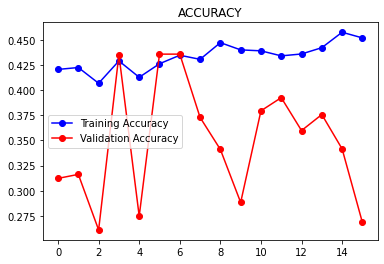

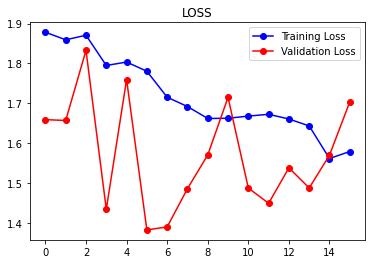

In [ ]:
import matplotlib.pyplot as plt

print(history.keys())
# see how the accuracy and the loss change during training
plt.title('ACCURACY')
plt.plot(history['accuracy'],'bo-',label = 'Training Accuracy')
plt.plot(history['val_accuracy'],'ro-',label = 'Validation Accuracy')
plt.legend()
plt.show()
plt.title('LOSS')
plt.plot(history['loss'],'bo-',label = 'Training Loss')
plt.plot(history['val_loss'],'ro-',label = 'Validation Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/weights.13-0.77.hdf5')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               131328

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
pred_Y = model.predict(test_dataset, batch_size = 512, verbose = True)
pred_Y_cat = np.argmax(pred_Y, -1)
y_true = tf.concat([labels_batch for data_batch, labels_batch in test_dataset], axis = 0)
y_true_cat = np.argmax(y_true, -1)
print('Accuracy on Test Data: %2.2f%%' % (accuracy_score(y_true_cat, pred_Y_cat)))
print(classification_report(y_true_cat, pred_Y_cat))

536/536 [==============================] - 323s 564ms/step
Accuracy on Test Data: 0.73%
              precision    recall  f1-score   support

           0       0.74      0.98      0.84     39533
           1       0.00      0.00      0.00      3762
           2       0.15      0.01      0.02      7861
           3       0.03      0.00      0.00      1214
           4       0.03      0.01      0.02      1206

    accuracy                           0.73     53576
   macro avg       0.19      0.20      0.18     53576
weighted avg       0.57      0.73      0.62     53576



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_true_cat, pred_Y_cat), 
            annot=True, fmt="d", cbar = False, cmap = plt.cm.Blues)